# Assignment 4 

<h3> Research Question </h3>
<br>
When does the air quality index become relatively safer for a person to live in two of the busiest cities in the world - Delhi(India), Beijing(China)? <br>
The dataset for this study was dereived from the kaggle datasets and the link to which are as below:<br>
1. <a href = " https://www.kaggle.com/rohanrao/air-quality-data-in-india">PM2.5 Delhi</a> <br>
2. <a href = " https://www.kaggle.com/joshuapaulbarnard/beijing-air-quality-pm25-from-2010-to-2017?select=Beijing+PM2_5+from+2010+to+2017.csv"> PM2.5 Beijing </a> <br>
Further, the Unhealthy PM2.5 value was found from <a href = "https://blissair.com/what-is-pm-2-5.htm" > this website </a>.

In [109]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import calendar
import matplotlib.dates as mdates

In [201]:
#loading the datafile containing air quality data of Delhi
delhi = pd.read_csv('Delhi_city_hour.csv')
delhi = delhi.loc[delhi.City == 'Delhi']
delhi['Datetime'] = pd.to_datetime(delhi['Datetime'])

#using only 2015 data
delhi = delhi.loc[delhi.Datetime.dt.year == 2015]
delhi = delhi.reset_index(drop = True, inplace = False)
delhi.tail()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
8754,Delhi,2015-12-31 19:00:00,142.61,359.15,75.98,93.07,171.46,61.63,2.64,19.93,48.90,3.49,11.11,0.00,412.0,Severe
8755,Delhi,2015-12-31 20:00:00,201.88,464.06,155.64,107.08,109.14,72.92,3.79,23.26,79.43,5.37,16.95,0.00,415.0,Severe
8756,Delhi,2015-12-31 21:00:00,272.73,535.32,154.26,107.86,170.23,78.44,2.89,22.78,133.28,7.53,29.56,0.00,432.0,Severe
8757,Delhi,2015-12-31 22:00:00,271.46,518.95,134.38,99.07,179.56,82.17,3.02,24.44,110.69,7.39,28.62,0.02,433.0,Severe
8758,Delhi,2015-12-31 23:00:00,292.16,552.16,138.57,91.81,133.89,82.63,3.16,23.55,96.43,6.49,21.81,0.00,435.0,Severe


In [202]:
#loading the datafile containing air quality data of Beijing
beijing = pd.read_csv("Beijing Air Quality from 2010 to 2017.csv")
beijing['Date'] = pd.to_datetime(beijing['Date'])

#using only 2015 data
beijing = beijing.loc[beijing.Date.dt.year == 2015].reset_index(drop = True,inplace = False)
beijing.tail()

,City,Country,Date,Season,PM2.5 concentration (ug/m^3),PM_Station 3,Dew Point (Fahrenheit),Temperature (Fahrenheit),PM2.5,PM10 concentration (ug/m^3),...,Pressure (hPa),Wind Direction,Wind Speed (m/s),"Precipitation (mm, hourly)","Precipitation (mm, Cumulated)",PM_Station 1,PM_US Post,PM_Station 2,Dew Point (Celsius),Temperature (Celsius)
113875,Beijing,China,2015-12-31 19:00:00,Winter,138.00,122.0,17.6,26.6,NaN,NaN,...,1031.0,SE,7.14,0.0,0.0,140.0,133.0,157.0,-8.0,-3.0
113876,Beijing,China,2015-12-31 20:00:00,Winter,168.50,149.0,17.6,28.4,NaN,NaN,...,1030.0,SE,8.03,0.0,0.0,157.0,169.0,199.0,-8.0,-2.0
113877,Beijing,China,2015-12-31 21:00:00,Winter,200.25,196.0,14.0,21.2,NaN,NaN,...,1030.0,NE,0.89,0.0,0.0,171.0,203.0,231.0,-10.0,-6.0
113878,Beijing,China,2015-12-31 22:00:00,Winter,219.75,221.0,14.0,21.2,NaN,NaN,...,1030.0,NE,1.78,0.0,0.0,204.0,212.0,242.0,-10.0,-6.0
113879,Beijing,China,2015-12-31 23:00:00,Winter,235.00,NaN,15.8,21.2,NaN,NaN,...,1029.0,NE,2.67,0.0,0.0,NaN,235.0,NaN,-9.0,-6.0


In [204]:
#finding the average of all attributes recorded per day
delhi = delhi.groupby(delhi.Datetime.dt.date).mean().reset_index(drop = False)
#delhi = delhi.reset_index(drop = False)
delhi.head()
#print(list(delhi.columns))

,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,2015-01-01,313.223043,607.977000,69.161739,36.392609,110.592609,33.854348,15.203478,9.252174,41.681739,14.356957,24.861739,9.844348,471.625000
1,2015-01-02,186.178333,269.548750,62.091667,32.868333,88.135000,31.834167,9.536667,6.645833,29.968333,10.548750,20.094583,4.292917,453.625000
2,2015-01-03,87.176667,131.901250,25.731250,30.313750,47.954167,69.554444,10.610833,2.649167,19.705833,3.910000,10.232083,1.993750,142.708333
3,2015-01-04,151.840000,241.840417,25.010000,36.910833,48.617917,130.357083,11.542917,4.633333,25.365000,4.257083,9.708333,3.339583,319.250000
4,2015-01-05,146.598333,219.131667,14.011250,34.922500,38.248750,122.881667,9.197083,3.330000,23.204167,2.797500,6.213750,2.962500,325.416667


In [205]:
beijing = beijing.groupby(beijing.Date.dt.date).mean().reset_index(drop = False)
beijing.head()

,Date,PM2.5 concentration (ug/m^3),PM_Station 3,Dew Point (Fahrenheit),Temperature (Fahrenheit),PM2.5,PM10 concentration (ug/m^3),SO2 concentration (ug/m^3),NO2 concentration (ug/m^3),CO concentration (ug/m^3),...,Humidity (%),Pressure (hPa),Wind Speed (m/s),"Precipitation (mm, hourly)","Precipitation (mm, Cumulated)",PM_Station 1,PM_US Post,PM_Station 2,Dew Point (Celsius),Temperature (Celsius)
0,2015-01-01,35.702815,47.739130,-8.485577,27.603846,35.702815,57.223022,21.559567,43.949640,987.265918,...,24.541667,1024.358974,2.357179,0.0,0.0,32.782609,54.583333,58.521739,-22.491987,-2.442308
1,2015-01-02,50.985976,56.083333,-1.011538,30.153846,50.985976,79.229965,31.306620,59.958188,1333.101045,...,27.833333,1022.842949,2.042564,0.0,0.0,47.954545,63.541667,65.041667,-18.339744,-1.025641
2,2015-01-03,151.953947,185.041667,4.516538,26.842308,151.953947,190.781250,66.721254,100.791667,3240.766551,...,46.541667,1011.176282,1.065513,0.0,0.0,206.000000,209.250000,220.375000,-15.268590,-2.865385
3,2015-01-04,172.983942,203.000000,7.968269,32.092308,172.983942,204.879433,70.825784,110.947183,3765.034965,...,41.583333,1010.137821,1.403910,0.0,0.0,192.333333,201.166667,234.000000,-13.350962,0.051282
4,2015-01-05,100.073157,92.000000,7.282885,38.086538,100.073157,154.190141,53.070423,65.571930,2677.464789,...,32.416667,1013.378205,4.261859,0.0,0.0,75.142857,90.875000,104.916667,-13.731731,3.381410


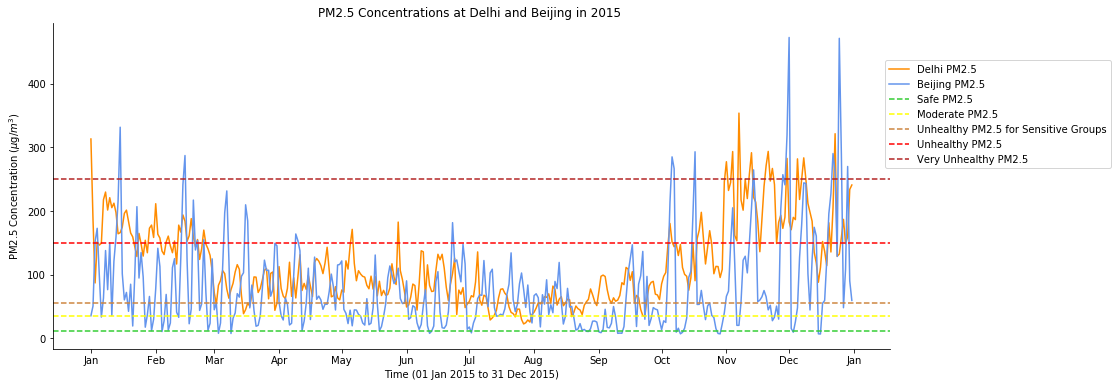

In [239]:
fig = plt.figure(figsize = (15,6))
delhi['Datetime'] = pd.to_datetime(delhi['Datetime'])
months = delhi['Datetime'].dt.month.unique() 
xlabel = []
for i in range(len(months)):
    xlabel.append(calendar.month_name[months[i]])
#print(list(beijing.columns))
plt.plot(delhi['Datetime'], delhi['PM2.5'], '-',label = 'Delhi PM2.5', color = 'darkorange')
plt.plot(beijing['Date'], beijing['PM2.5 concentration (ug/m^3)'],'-', label = 'Beijing PM2.5', color = 'cornflowerblue')
#plt.xlim(min(delhi['Datetime']), max(delhi['Datetime']))
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
m1 = delhi['PM2.5'].median()
m2 = beijing['PM2.5 concentration (ug/m^3)'].median()
beijing['PM2.5'] = beijing['PM2.5 concentration (ug/m^3)']

plt.axhline(12, label = 'Safe PM2.5',ls = '--', color = 'limegreen' )
plt.axhline(35.4,label = 'Moderate PM2.5', ls = '--',color = 'yellow' )
plt.axhline(55.4, label = 'Unhealthy PM2.5 for Sensitive Groups',ls = '--', color = 'peru')
plt.axhline(150.4,label = 'Unhealthy PM2.5',ls = '--', color = 'red')
plt.axhline(250.4,label = 'Very Unhealthy PM2.5', ls = '--', color = 'firebrick')
#plt.axhline(500.4, label = 'Hazardous', ls = '--', color = 'brown')

#ax.fill_between(delhi['Datetime'], 12.1, delhi['PM2.5'], where = ((delhi['PM2.5'] >= 12.1) & (delhi['PM2.5']<=35.4)),label = 'Moderate PM2.5', color = 'yellow')
#ax.fill_between(delhi['Datetime'], 12.1, beijing['PM2.5'], where = ((beijing['PM2.5'] >= 12.1) & (beijing['PM2.5']<=35.4)),color = 'yellow')
#ax.fill_between(delhi['Datetime'], 35.5, delhi['PM2.5'], where = ((delhi['PM2.5'] >= 35.5) & (delhi['PM2.5']<=55.4)) ,  label = 'Unhealthy PM2.5 for Sensitive Groups', color = 'peru')
#ax.fill_between(delhi['Datetime'], 35.5, beijing['PM2.5'], where = ((beijing['PM2.5'] >= 35.5) & (beijing['PM2.5']<=55.4)),color = 'peru')
#ax.fill_between(delhi['Datetime'], 150.4, delhi['PM2.5'], where = ((delhi['PM2.5'] >= 55.5)), label = 'Unhealthy PM2.5', color = 'red')
#ax.fill_between(delhi['Datetime'], 150.4, beijing['PM2.5'], where = ((beijing['PM2.5'] >= 55.5)),color = 'red')
#ax.fill_between(delhi['Datetime'], 150.5,250.4, )
#y_text = plt.text(0.2, 0.3, 'Unhealthy PM2.5 = {}'.format(150.4), bbox=dict(fc='white',ec='k'))
plt.xlabel("Time (01 Jan 2015 to 31 Dec 2015)")
plt.ylabel("PM2.5 Concentration ($\mu$g/$m^3$)")
plt.title("PM2.5 Concentrations at Delhi and Beijing in 2015 ")
plt.legend(fontsize = 10, frameon = True, loc='best', bbox_to_anchor=(0.48, 0.4, 0.79, 0.5))
plt.savefig("result.png")

It is found that both these cities has a very high level of PM2.5 values and during some months dangerouly high. None of the cities acheived the 'safe' PM2.5 value of less than 12.1$\mu$g/$m^3$.However, during some months as can be observed from the figure, both cities, were able to have PM2.5 values in the moderate range, with Delhi for a longer time. Hence, we can conclude that for a sensitive person, both cities are highly unsafe to live in, (2015), as it results in severe respiratory issues. But for a normal person, the city of Delhi is okay to live in for short periods between months of August and September, May and June etc, with a moderate value for PM2.5 of lower than 35.5. 